<a href="https://colab.research.google.com/github/princeKike27/Poland-House-Prices-Prediction/blob/main/Poland_House_Prices_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Poland House Prices Prediction

For this project I analyzed data from the housing market in 3 cities in Poland Krakow, Warsaw and Poznań ....

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch

In [2]:
# load dataset
df_houses = pd.read_csv('https://raw.githubusercontent.com/princeKike27/Poland-House-Prices-Prediction/main/poland_houses.csv',
                        encoding='latin-1', sep=';')

df_houses

,address,city,floor,id,latitude,longitude,price,rooms,sq,year
0,Podgórze Zab³ocie Stanis³awa Klimeckiego,Kraków,2.0,23918.0,500.492.242,199.703.793,749000.0,3.0,74.05,2021.0
1,Praga-Po³udnie Grochowska,Warszawa,3.0,17828.0,522.497.745,211.068.857,240548.0,1.0,24.38,2021.0
2,Krowodrza Czarnowiejska,Kraków,2.0,22784.0,500.669.642,199.200.249,427000.0,2.0,37.00,1970.0
3,Grunwald,Poznañ,2.0,4315.0,52.404.212,16.882.542,1290000.0,5.0,166.00,1935.0
4,Ochota Gotowy budynek. Stan deweloperski. Osta...,Warszawa,1.0,11770.0,52.212.225,209.726.299,996000.0,5.0,105.00,2020.0
...,...,...,...,...,...,...,...,...,...,...
23759,Stare Miasto Naramowice,Poznañ,0.0,3976.0,524.496.489,169.494.082,543000.0,4.0,77.00,2020.0
23760,W³ochy,Warszawa,4.0,10206.0,521.861.093,209.484.377,910000.0,3.0,71.00,2017.0
23761,Nowe Miasto Malta ul. Katowicka,Poznañ,0.0,4952.0,523.973.449,169.619.394,430695.0,3.0,50.67,2022.0
23762,Podgórze Duchackie Walerego S³awka,Kraków,6.0,24148.0,500.242.313,19.959.569,359000.0,2.0,38.86,2021.0


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Data Cleaning & Tidying

In [3]:
# shape of df 
print(df_houses.shape)

(23764, 10)


In [4]:
# column types
df_houses.dtypes

address       object
city          object
floor        float64
id           float64
latitude      object
longitude     object
price        float64
rooms        float64
sq           float64
year         float64
dtype: object

In [5]:
# change floor, rooms, year to int
df_houses['floor'] = df_houses['floor'].astype(int)
df_houses['rooms'] = df_houses['rooms'].astype(int)
df_houses['year'] = df_houses['year'].astype(int)


In [6]:
# unique values of year column
df_houses.year.unique()

array([2021, 1970, 1935, 2020, 2022, 2003, 1982, 1999, 1968, 1989, 2019,
       2005, 1930, 2008, 1960, 2013, 1936, 1890, 2010, 1972, 2016, 2009,
       1990, 2018, 2000, 1974, 1976, 2017, 1980, 1938, 1926, 1963, 2015,
       2012, 1971, 1949, 1977, 1920, 2014, 2007, 2001, 1911, 1973, 2006,
       1975, 1978, 1987, 1984, 2023, 1904, 2004, 1956, 1900, 1966, 1950,
       1931, 1912, 1951, 1955, 1983, 1964, 1905, 1962, 2011, 1939, 1965,
       1967, 2002, 1952, 1927, 1991, 1985, 1953, 1969, 1979, 1910, 1988,
       1954, 1997, 1998, 1886, 1992, 1996, 1959, 1880, 1981, 1916, 1986,
       1918, 1879, 1946, 1901, 1780, 1995, 1908, 1937,   75, 1994, 1864,
       1919, 1923, 1958, 1993, 1915, 1948, 1907, 1957, 1961, 1902, 1924,
       1885, 1934, 1947, 1925, 1913, 1892, 1922, 1929, 1841, 1933, 1897,
       1895, 1932, 1854, 1893, 1903, 1906, 1830, 2980,   80, 1940, 1914,
       1760, 1898, 1928,  202, 1942, 1876, 1899,   70, 1896, 1945, 1784,
       1860, 1889, 1883, 1917,  195, 1921,   81, 19

In [7]:
# select rows with years 75, 214, 2980, 80, 202, 70, 195, 81, 200 
df_houses[(df_houses['year'] == 75) | (df_houses['year'] == 214) | (df_houses['year'] == 2980) |
          (df_houses['year'] == 80) | (df_houses['year'] == 202) | (df_houses['year'] == 70) |
          (df_houses['year'] == 195) | (df_houses['year'] == 81) | (df_houses['year'] == 200)]

,address,city,floor,id,latitude,longitude,price,rooms,sq,year
1032,ródmiecie ¯urawia,Warszawa,1,14485.0,522.319.581,210.067.249,760000.0,3,53.00,75
4345,Targówek Mokra,Warszawa,8,16082.0,522.319.581,210.067.249,520000.0,3,56.00,2980
4513,Wola Krochmalna,Warszawa,10,13832.0,522.319.581,210.067.249,320000.0,1,28.00,80
6458,Bie¿anów-Prokocim Bie¿anów Pod³êska,Kraków,2,21883.0,500.469.432,19.997.153.435.836.600,410000.0,2,48.00,202
7659,Nowe Miasto G³uszyna,Poznañ,2,1603.0,523.263.616,169.628.861,235000.0,2,40.50,70
8972,Grunwald £azarz ul. G³ogowska,Poznañ,1,56.0,524.016.616,169.100.607,329000.0,2,27.80,195
10408,Bemowo ul. Karabeli,Warszawa,9,8116.0,522.319.581,210.067.249,450000.0,2,47.80,81
14431,Stare Miasto Pi¹tkowo os. Boles³awa Chrobrego,Poznañ,1,640.0,524.006.632,1.691.973.259.178.080,375000.0,3,64.00,80
19206,Krowodrza Krowodrza Górka S³omczyñskiego,Kraków,0,27281.0,500.469.432,19.997.153.435.836.600,655000.0,3,73.22,200
22999,Bielany Radiowo Arkuszowa,Warszawa,2,11359.0,522.319.581,210.067.249,660000.0,3,59.00,214


In [8]:
# replace years to correct values 
df_houses['year'].replace({2980: 1980,
                           80: 1980,
                           202: 2002,
                           70: 1970,
                           195: 1950,
                           81: 1981,
                           80: 1980,
                           200: 2000,
                           75: 1975,
                           214: 2014}, inplace=True)

In [9]:
# check changes
df_houses.dtypes

address       object
city          object
floor          int64
id           float64
latitude      object
longitude     object
price        float64
rooms          int64
sq           float64
year           int64
dtype: object

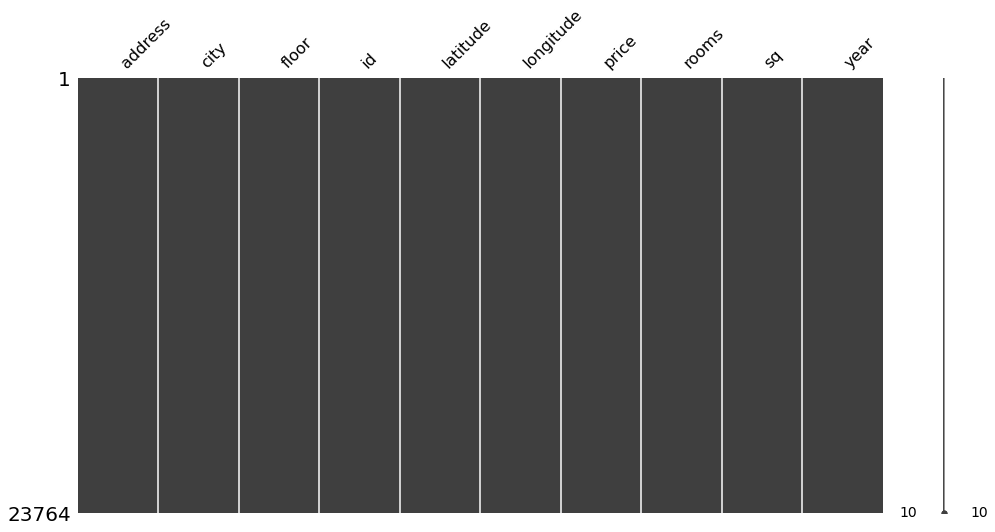

In [10]:
# check for missing values
import missingno as msg

msg.matrix(df_houses, figsize=(16, 8))

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Data Analysis

In [11]:
# descriptive statistics of numeric columns
df_houses.describe()

,floor,id,price,rooms,sq,year
count,23764.000000,23764.000000,2.376400e+04,23764.000000,2.376400e+04,23764.000000
mean,2.808744,15621.964484,6.493536e+05,2.620771,1.027249e+02,2001.209939
std,2.463467,8617.293898,5.326970e+05,0.996530,6.533688e+03,31.164981
min,0.000000,1.000000,5.000000e+03,1.000000,8.800000e+00,1070.000000
25%,1.000000,8420.750000,4.115461e+05,2.000000,4.200000e+01,1985.000000
50%,2.000000,15637.500000,5.200000e+05,3.000000,5.389500e+01,2019.000000
75%,4.000000,23111.250000,6.999990e+05,3.000000,6.891500e+01,2021.000000
max,10.000000,30308.000000,1.500000e+07,10.000000,1.007185e+06,2024.000000


### Houses per City

In [12]:
# function to calculate number_houses and avg_price

def city_calc(df): 
  # dict to store columns
  calc = {}
  calc['number_houses'] = len(df.id)
  calc['avg_price'] = df['price'].mean()

  # return a Pandas Series
  return pd.Series(calc, index=['number_houses', 'avg_price'])

In [13]:
# groupby city & apply function
houses_city = df_houses.groupby(['city']).apply(city_calc).reset_index()

# add %_homes column
houses_city['%_homes'] = (houses_city.number_houses / len(df_houses)) * 100

houses_city.head()

,city,number_houses,avg_price,%_homes
0,Kraków,9764.0,593756.068258,41.087359
1,Poznañ,4149.0,468527.120154,17.459182
2,Warszawa,9851.0,780619.918237,41.453459


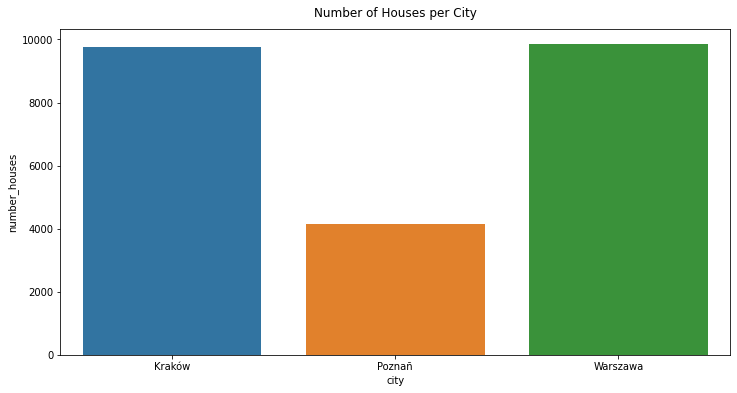

In [14]:
# plot number of houses per city
f, ax = plt.subplots(figsize=(12, 6))

sns.barplot(x='city', y='number_houses', data=houses_city)

plt.title('Number of Houses per City', pad=12)

plt.show()

- As can be seen in the graph and table above more than 80% of the houses are located in Warsaw and Krakow $9851$ and $9764$ respectively.

- The avg house price per city is higher in Warsaw which is the capital city of Poland $780,634$ $zloty$ ($167,348$ $euros$), followed by Krakow $593,756$ $zloty$ ($127,286$ $euros$) and by Poznan, the smallest of the three cities, $468,527$ $zloty$ ($100,440$ $euros$)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Avg Floors, Rooms and Square Meters per City

In [15]:
# function to calculate 'avg_floors', 'avg_rooms', and 'avg_sq_meters'

def averages_calc(df):
  # dictionary to store calculations
  calc = {}
  calc['avg_floors'] = df.floor.mean()
  calc['avg_rooms'] = df.rooms.mean()
  calc['avg_sq_meters'] = df.sq.mean()

  # return Series
  return pd.Series(calc, index=['avg_floors', 'avg_rooms', 'avg_sq_meters'])

In [16]:
# groupby city & apply function
houses_avg_city = df_houses.groupby(['city']).apply(averages_calc).reset_index()

houses_avg_city

,city,avg_floors,avg_rooms,avg_sq_meters
0,Kraków,2.540045,2.598730,160.720631
1,Poznañ,2.323210,2.657026,61.263203
2,Warszawa,3.279566,2.627347,62.704040


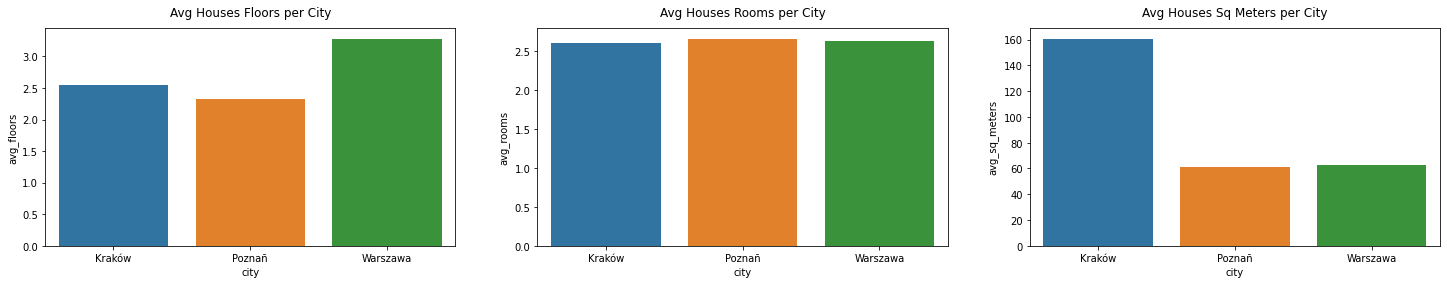

In [17]:
# barplot 

fig = plt.figure(figsize=(25, 4))

# avg_floors per city
ax = plt.subplot(1, 3, 1)
sns.barplot(x='city', y='avg_floors', data=houses_avg_city)
plt.title('Avg Houses Floors per City', pad=12)

# avg rooms per city
ax = plt.subplot(1, 3, 2)
sns.barplot(x='city', y='avg_rooms', data=houses_avg_city)
plt.title('Avg Houses Rooms per City', pad=12)

# avg sq_meters per city
ax = plt.subplot(1, 3, 3)
sns.barplot(x='city', y='avg_sq_meters', data=houses_avg_city)
plt.title('Avg Houses Sq Meters per City', pad=12)


plt.show()

- As can be seen in the plots and table above the **Avg Floors per Houses** is higher in $Warsaw$ the capital city of Poland with $3$ floors per house. On the other hand $Krakow$ and $Poznan$, both have an avg of $2$ floors per house.

- In terms of **Avg Rooms per Houses**, all three cities have on avg $2.5$ rooms per house.

- Aditionally, the **Avg Sq Meters per House** are significantly higher in $Krakow$, with an average of $160m^2$ per house, it exceeds in more than double the average of $Warsaw$ and $Poznan$, $62m^2$ and $61m^2$ respectively.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Avg Houses per Year

In [18]:
# function that calculates avg_houses & avg_price per year
def average_houses(df):
  # dictionary to store calculations
  calc = {}
  calc['avg_houses'] = df.id.count()
  calc['avg_price'] = df.price.mean()

  # return Series
  return pd.Series(calc, index=['avg_houses', 'avg_price'])

In [19]:
# groupby year and city
houses_year = df_houses.groupby(['year', 'city']).apply(average_houses).reset_index()

# '%' of houses 
houses_year['%'] = (houses_year.avg_houses / df_houses.id.count()) * 100

houses_year.sort_values(by='avg_houses', ascending=False, inplace=True)

# select top 20 years with more houses
top_20 = houses_year.head(20)
top_20

,year,city,avg_houses,avg_price,%
387,2021,Kraków,2465.0,5.447005e+05,10.372833
384,2020,Kraków,1656.0,5.913433e+05,6.968524
390,2022,Kraków,1247.0,5.148134e+05,5.247433
389,2021,Warszawa,1243.0,6.887584e+05,5.230601
385,2020,Poznañ,1088.0,5.102572e+05,4.578354
391,2022,Poznañ,929.0,4.323993e+05,3.909275
386,2020,Warszawa,916.0,7.790521e+05,3.854570
392,2022,Warszawa,844.0,6.079946e+05,3.551591
388,2021,Poznañ,675.0,4.623591e+05,2.840431
381,2019,Kraków,341.0,8.314649e+05,1.434944


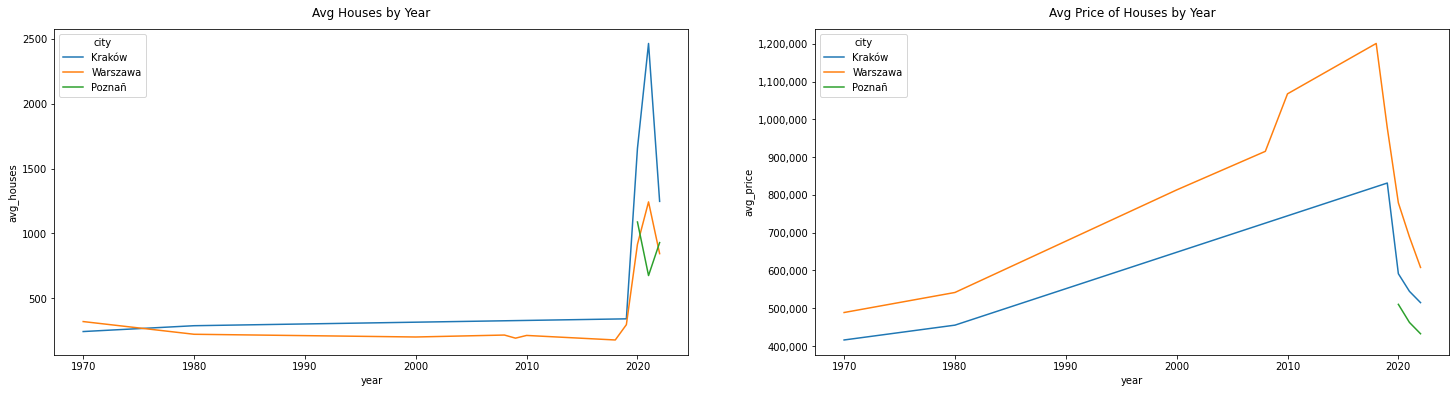

In [20]:
# lineplot
fig = plt.figure(figsize=(25, 6))

# lineplot year - avg houses
ax = plt.subplot(1, 2, 1)
sns.lineplot(x='year', y='avg_houses', data=top_20, hue='city')
plt.title('Avg Houses by Year', pad=12)

# lineplot year - avg house price
ax = plt.subplot(1, 2, 2)
sns.lineplot(x='year', y='avg_price', data=top_20, hue='city')
# set y_ticks
ax.set_yticklabels(['0', '400,000', '500,000', '600,000', '700,000', '800,000', '900,000',
                   '1,000,000', '1,100,000', '1,200,000'])

plt.title('Avg Price of Houses by Year', pad=12)


plt.show()

- As can be seen in the lineplot **Avg Houses by Year** there has been a significant increase in the avg number of houses after 2019. The biggest raise corresponds to the city of $Krakow$ which from 2019 to 2020 had a raise of $385$%, $1315$ more houses for sale.

- On the other hand, the lineplot **Avg Price of Houses by Year** shows the average trend of house prices in $Krakow$, $Warsaw$ and $Poznan$ from 1970 to 2022. Even though, average house prices have been increasing throught the years, there has been a significant reduction in the average house price in the three cities after they achieve their highest price in 2018 - 2019.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Floors & Rooms Distribution

floor Mean: 2.8087443191381922
floor Median: 2.0
floor Skewness: 1.137546445963946 

rooms Mean: 2.620770913987544
rooms Median: 3.0
rooms Skewness: 0.6620435412550197 



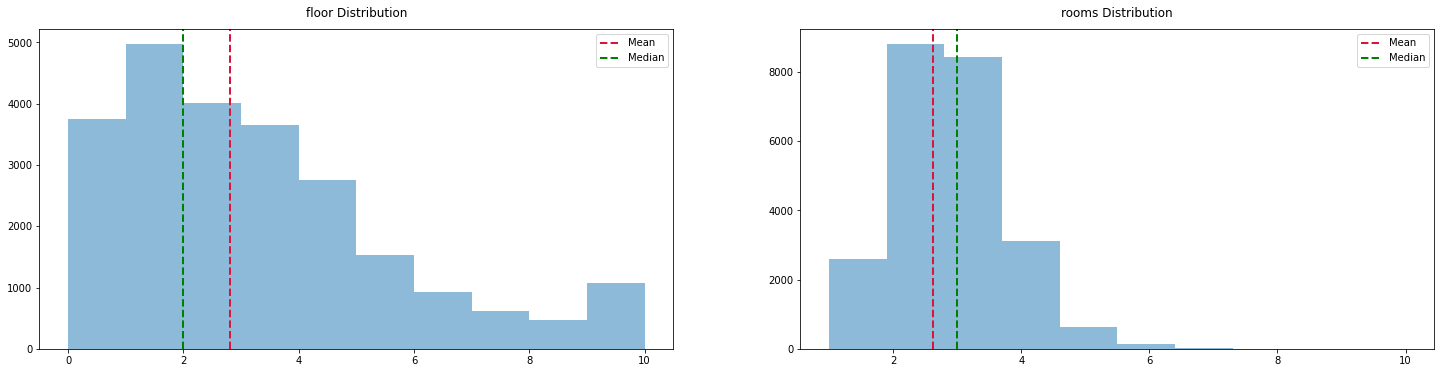

In [21]:
# features list
features = ['floor', 'rooms']

# plot counter
counter = 1

fig = plt.figure(figsize=(25, 20))
# plot histogram for each feature
for el in features:
  ax = plt.subplot(3, 2, counter)

  # histogram
  plt.hist(x=df_houses[el], alpha=0.5)
  # mean
  plt.axvline(x=df_houses[el].mean(), color='crimson', linestyle='dashed', linewidth=2, label='Mean')
  # median
  plt.axvline(x=df_houses[el].median(), color='green', linestyle='dashed', linewidth=2, label='Median')

  print(f'{el} Mean: {df_houses[el].mean()}')
  print(f'{el} Median: {df_houses[el].median()}')
  print(f'{el} Skewness: {df_houses[el].skew()}', '\n')

  plt.legend()
  plt.title(f'{el} Distribution', pad=12)

  counter += 1

plt.show()




![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Features Encoding

- The new columns that are going to be created are:
  - is_warsaw >> 1 if the house is located in Warsaw
  - is_greater_1970 >> 1 if the house was built in a year greater than 1970.

In [22]:
# new column creation

# is_warwaw >> 1 if the house is located in Warsaw
df_houses['is_warsaw'] = [1 if df_houses.iloc[index].city == 'Warszawa' else 0 for index in df_houses.index]

# is_greater_1970 >> 1 if the house year is greater than 1970
df_houses['is_greater_1970'] = [1 if df_houses.iloc[index].year > 1970 else 0 for index in df_houses.index]

In [23]:
# check changes
df_houses.head()

,address,city,floor,id,latitude,longitude,price,rooms,sq,year,is_warsaw,is_greater_1970
0,Podgórze Zab³ocie Stanis³awa Klimeckiego,Kraków,2,23918.0,500.492.242,199.703.793,749000.0,3,74.05,2021,0,1
1,Praga-Po³udnie Grochowska,Warszawa,3,17828.0,522.497.745,211.068.857,240548.0,1,24.38,2021,1,1
2,Krowodrza Czarnowiejska,Kraków,2,22784.0,500.669.642,199.200.249,427000.0,2,37.00,1970,0,0
3,Grunwald,Poznañ,2,4315.0,52.404.212,16.882.542,1290000.0,5,166.00,1935,0,0
4,Ochota Gotowy budynek. Stan deweloperski. Osta...,Warszawa,1,11770.0,52.212.225,209.726.299,996000.0,5,105.00,2020,1,1


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Features Selection

- The features **(Inputs)** that are going to be selected for the *prediction model* are:
  - *is_warsaw, floor, rooms, sq, is_greater_1970*

- The **Outputs** for the model is the *price* variable.
  - the prices are in $zloty$, polands currency. $1$ $zloty$ $=$ $0.21$ $euros$

In [24]:
# create new df
df_houses_raw = df_houses[['is_warsaw', 'floor', 'rooms', 'sq', 'is_greater_1970', 'price']]

df_houses_raw.head()

,is_warsaw,floor,rooms,sq,is_greater_1970,price
0,0,2,3,74.05,1,749000.0
1,1,3,1,24.38,1,240548.0
2,0,2,2,37.00,0,427000.0
3,0,2,5,166.00,0,1290000.0
4,1,1,5,105.00,1,996000.0


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Features Standarization

- **Normalization** is going to be used on *floor, rooms and sq* features because they are in different scales and there distributions are skewed. This technique will map the values to a new range of 0 to 1.


$$ Norm = \frac{x - x_{min}}{x_{max} - x_{min}} $$

In [25]:
# features df
features_df = df_houses_raw[['is_warsaw', 'floor', 'rooms', 'sq', 'is_greater_1970']]
features_df

,is_warsaw,floor,rooms,sq,is_greater_1970
0,0,2,3,74.05,1
1,1,3,1,24.38,1
2,0,2,2,37.00,0
3,0,2,5,166.00,0
4,1,1,5,105.00,1
...,...,...,...,...,...
23759,0,0,4,77.00,1
23760,1,4,3,71.00,1
23761,0,0,3,50.67,1
23762,0,6,2,38.86,1


In [26]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# initialize scaler
scaler = MinMaxScaler()
# normalize data
features = scaler.fit_transform(features_df) 

In [27]:
# check normalization on first record
features[0]

array([0.00000000e+00, 2.00000000e-01, 2.22222222e-01, 6.47850892e-05,
       1.00000000e+00])

In [29]:
# create df to continue further analysis of normalized features
df_features = pd.DataFrame(features, columns=['is_warsaw', 'floor', 'rooms', 'sq', 'is_greater_1970'])

# add price column
df_features['price'] = df_houses_raw['price']

df_features.head()

,is_warsaw,floor,rooms,sq,is_greater_1970,price
0,0.0,0.2,0.222222,0.000065,1.0,749000.0
1,1.0,0.3,0.000000,0.000015,1.0,240548.0
2,0.0,0.2,0.111111,0.000028,0.0,427000.0
3,0.0,0.2,0.444444,0.000156,0.0,1290000.0
4,1.0,0.1,0.444444,0.000096,1.0,996000.0


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Correlation Between Features

### Correlation Heatmap

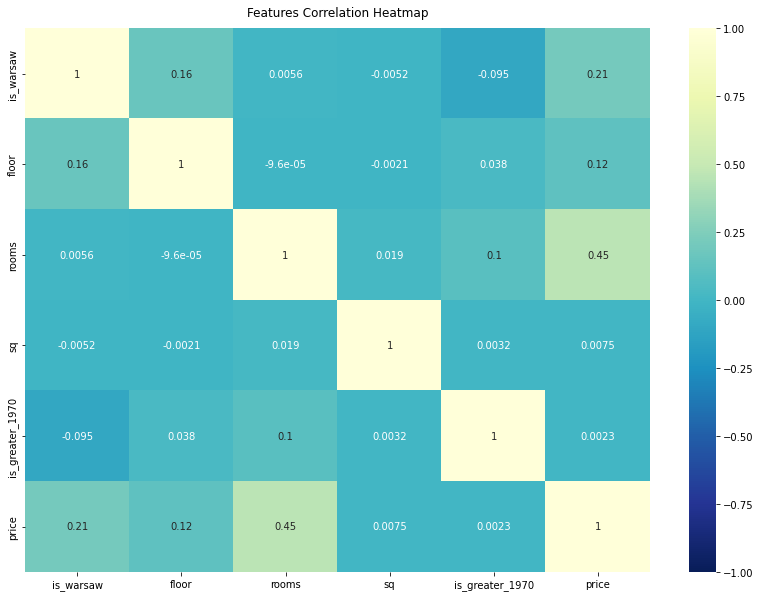

In [35]:
# heatmap of features correlation
f, ax = plt.subplots(figsize=(14, 10))

sns.heatmap(df_features.corr(), vmin=-1, vmax=1, annot=True, cmap='YlGnBu_r')

plt.title('Features Correlation Heatmap', pad=12)
plt.show()

- As can be seen in the **Heatmap** above there is little or none *Multicolinearity* between the features. None of them is lower than $-0.5$ and greater than $0.5$. This means, that the features selected are linearly independent among them and are suitable for a *Linear Regression Model*

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)